In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [8]:
df = pd.read_csv("../../Datasets/titanic.csv")

In [9]:
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [114]:
## Random sample imputation can be done only if the data is following MCAR concepts 

In [12]:
df.shape  # 418 - 86 = 

(418, 12)

In [13]:
418 - 86 # out of 332  values 

332

In [14]:
s = df['Age'].dropna().sample(3)
s

37     21.0
305    64.0
220    30.0
Name: Age, dtype: float64

In [15]:
s = df['Age'].dropna().sample(df['Age'].isnull().sum() , random_state = 42)

In [77]:
## we need to replace the values 

In [78]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [64]:
df['Age'][10]

nan

In [65]:
df[df['Age'].isnull()].index

Int64Index([ 10,  22,  29,  33,  36,  39,  41,  47,  54,  58,  65,  76,  83,
             84,  85,  88,  91,  93, 102, 107, 108, 111, 116, 121, 124, 127,
            132, 133, 146, 148, 151, 160, 163, 168, 170, 173, 183, 188, 191,
            199, 200, 205, 211, 216, 219, 225, 227, 233, 243, 244, 249, 255,
            256, 265, 266, 267, 268, 271, 273, 274, 282, 286, 288, 289, 290,
            292, 297, 301, 304, 312, 332, 339, 342, 344, 357, 358, 365, 366,
            380, 382, 384, 408, 410, 413, 416, 417],
           dtype='int64')

In [69]:
x = df[df['Age'].isnull()].head(1)
x

,Survived,Age,Fare,Age_c
10,0,NaN,7.8958,22.5


In [68]:
s = df['Age'].dropna().sample(1 , random_state = 42)
s.index = [10]
df['Age_c'] = s

In [16]:
s.index

Int64Index([ 27, 398,  89, 241,  68, 207, 354, 224, 262, 245,  92,   9, 399,
            157, 345, 165, 142, 182,  94, 250, 137, 172, 372, 247,   5, 138,
            330, 403, 204, 402, 209, 378,  74, 103, 295, 232, 228, 363,  55,
            147,  38,  50, 291, 226, 141,  87, 222,  53, 126, 392, 117, 293,
            254,  17, 136, 316,   7,  66, 184, 284, 374, 370, 328,   3,  95,
            309,  71, 283,  96, 333,  18,  26, 318, 405, 337, 221, 100, 139,
            179, 307, 144, 176, 220, 112, 393, 397],
           dtype='int64')

In [128]:
def random(df , variable):
    df[variable+"_replaced"] = df[variable].copy()
    s = df['Age'].dropna().Asample(df['Age'].isnull().sum() , random_state = 42)
    s.index = df[df['Age'].isnull()].index
    df.loc[df['Age'].isnull() , 'Age_replaced'] = s
    
    
    

In [129]:
random(df,'Age')

In [130]:
df.isnull().sum()

FireplaceQu             690
SalePrice                 0
FireplaceQu_replaced      0
dtype: int64

In [131]:
def cat(df,var):
    kamal = pd.concat([
        
        
        df['FireplaceQu'].value_counts() / len(df.dropna()),
        df['FireplaceQu_replaced'].value_counts() / len(df)
        
    ],axis = 1)
    
    return kamal

In [132]:
cat(df,'Fare').head()

,FireplaceQu,FireplaceQu_replaced
Gd,0.493506,0.499315
TA,0.406494,0.399315
Fa,0.042857,0.044521
Ex,0.031169,0.031507
Po,0.025974,0.025342


In [138]:
def main(df,var,target):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    for i in df[var].dropna().unique():
        df[df[var] == i][target].plot(kind='kde',ax = ax,label = i)
    plt.legend(loc = 0)
    plt.show()

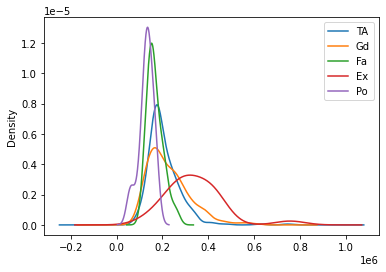

In [139]:
main(df,'FireplaceQu','SalePrice')

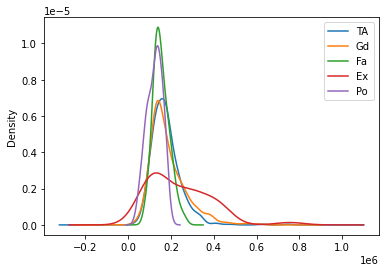

In [140]:
main(df,'FireplaceQu_replaced','SalePrice')

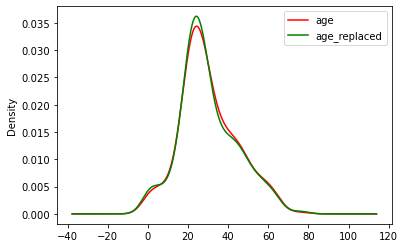

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

df['Age'].plot(kind = 'kde',color = 'r',label = 'age')

df['Age_replaced'].plot(kind = 'kde',color = 'g',label = 'age_replaced')

plt.legend(loc=  0)

plt.show()

### Using Feature Engine 

In [149]:
cols_to_use = [
    'BsmtQual', 'FireplaceQu', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt',
    'SalePrice'
]

In [17]:
df = pd.read_csv("./../titanic.csv",usecols = ['Age'])

In [18]:
df.head()

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0


In [20]:
from feature_engine.imputation import RandomSampleImputer

In [21]:
ran = RandomSampleImputer(random_state=42)

In [22]:
df.isnull().sum()

Age    86
dtype: int64

In [23]:
ran.fit(df)

RandomSampleImputer(random_state=42)

In [24]:
ran.variables_

['Age']

In [25]:
ran.X_.head()

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0


In [26]:
temp = ran.transform(df)

In [29]:
temp.head()

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0


In [30]:
temp.isnull().sum()

Age    0
dtype: int64

In [31]:
temp[ran.variables_].isnull().mean()

Age    0.0
dtype: float64